In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# let's see if we can load in some DALEC data (following processing)

file_path = "C:/Users/daa5/OneDrive - University of Stirling/Documents/DALEC_Doc/CalibratedOutputFiles/"
file_name = "LOG_0021.dtf"

spect_wavelengths = pd.read_csv(file_path + file_name,
                                header=15,
                                nrows=200,
                                names=['Pixel_no', 'Ed', 'Lu', 'Lsky'],
                               )
spect_wavelengths.head() # these are just the mappings of wavelength to pixel number

log_21 = pd.read_csv(file_path + file_name,
                     header=216,
                     parse_dates=True,
                     dayfirst=True,
                     infer_datetime_format=True,
                     )
# some output from the 'status' command got into the data, so we'll just filter this by removing any cols with NAs
log_21.dropna(inplace=True,
              axis=0,
             )
log_21.head()

,Sample #,UTC Date,UTC Time,GPS_Fix,Lat,Lon,Solar Azi,Solar Elev,Relaz,Heading,...,Spec[211],Spec[212],Spec[213],Spec[214],Spec[215],Spec[216],Spec[217],Spec[218],Spec[219],Spec[220]
33,0,28/04/2022,11:01:02.645,A,56.1472854,-3.92375488,155.5,45.7,32.5,187.8,...,0.363419,0.359835,0.351043,0.338907,0.339545,0.324507,0.322804,0.308608,0.301075,0.274439
34,0,28/04/2022,11:01:02.645,A,56.1472854,-3.92375488,155.5,45.7,32.5,187.8,...,0.000407,0.000563,0.000881,0.000572,0.000415,0.000359,0.000571,0.000913,0.000608,0.000596
35,0,28/04/2022,11:01:02.645,A,56.1472854,-3.92375488,155.5,45.7,32.5,187.8,...,0.028542,0.026276,0.025544,0.027333,0.029693,0.025414,0.028448,0.024656,0.023073,0.020993
36,1,28/04/2022,11:01:04.135,A,56.1472892,-3.92375488,155.6,45.7,-72.2,83.3,...,0.363598,0.359150,0.348433,0.350345,0.337712,0.324889,0.323232,0.315623,0.311359,0.294310
37,1,28/04/2022,11:01:04.135,A,56.1472892,-3.92375488,155.6,45.7,-72.2,83.3,...,0.000624,0.000751,0.000619,0.000738,0.000819,0.000735,0.000730,0.000556,0.000562,0.000985


In [4]:
log_21['Sample #']

33       0
34       0
35       0
36       1
37       1
      ... 
349    105
350    105
351    106
352    106
353    106
Name: Sample #, Length: 321, dtype: object

In [6]:
# Let's get our spectral data in long format:

log_221_long = pd.wide_to_long(log_21, [' Spec['], i=['Sample #', ' Channel'], j='spectral_ind', suffix='\d+]')

In [7]:
log_221_long

Solar Azi         Lat  Roll  Saturation Flag  \
Sample #  Channel spectral_ind                                                 
0        Ed       21]               155.5  56.1472854   0.0                0   
                  22]               155.5  56.1472854   0.0                0   
                  23]               155.5  56.1472854   0.0                0   
                  24]               155.5  56.1472854   0.0                0   
                  25]               155.5  56.1472854   0.0                0   
...                                   ...         ...   ...              ...   
106      Lsky     216]              156.7  56.1472816  -1.0                0   
                  217]              156.7  56.1472816  -1.0                0   
                  218]              156.7  56.1472816  -1.0                0   
                  219]              156.7  56.1472816  -1.0                0   
                  220]              156.7  56.1472816  -1.0                0   

                                Heading     Temp  Pitch      UTC Time  \
Sample #  Channel spectral_ind                                          
0        Ed       21]             187.8   22.125    0.0  11:01:02.645   
                  22]             187.8   22.125    0.0  11:01:02.645   
                  23]             187.8   22.125    0.0  11:01:02.645   
                  24]             187.8   22.125    0.0  11:01:02.645   
                  25]             187.8   22.125    0.0  11:01:02.645   
...                                 ...      ...    ...           ...   
106      Lsky     216]             83.3  23.9375    0.0  11:04:23.889   
                  217]             83.3  23.9375    0.0  11:04:23.889   
                  218]             83.3  23.9375    0.0  11:04:23.889   
                  219]             83.3  23.9375    0.0  11:04:23.889   
                  220]             83.3  23.9375    0.0  11:04:23.889   

                                  UTC Date          Lon  Gearpos  Solar Elev  \
Sample #  Channel spectral_ind                                                 
0        Ed       21]           28/04/2022  -3.92375488    179.4        45.7   
                  22]           28/04/2022  -3.92375488    179.4        45.7   
                  23]           28/04/2022  -3.92375488    179.4        45.7   
                  24]           28/04/2022  -3.92375488    179.4        45.7   
                  25]           28/04/2022  -3.92375488    179.4        45.7   
...                                    ...          ...      ...         ...   
106      Lsky     216]          28/04/2022  -3.92361164    179.2        45.9   
                  217]          28/04/2022  -3.92361164    179.2        45.9   
                  218]          28/04/2022  -3.92361164    179.2        45.9   
                  219]          28/04/2022  -3.92361164    179.2        45.9   
                  220]          28/04/2022  -3.92361164    179.2        45.9   

                                Relaz  GPS_Fix  Integration Time  Voltage  \
Sample #  Channel spectral_ind                                              
0        Ed       21]            32.5        A                20     11.6   
                  22]            32.5        A                20     11.6   
                  23]            32.5        A                20     11.6   
                  24]            32.5        A                20     11.6   
                  25]            32.5        A                20     11.6   
...                               ...      ...               ...      ...   
106      Lsky     216]          -73.4        A                 7     11.5   
                  217]          -73.4        A                 7     11.5   
                  218]          -73.4        A                 7     11.5   
                  219]          -73.4        A                 7     11.5   
                  220]          -73.4        A                 7     11.5   

In [8]:
log_221_long.reset_index(level=2, inplace=True) # remove spectral_ind as an index


In [9]:
log_221_long['spectral_ind'] = pd.to_numeric(log_221_long['spectral_ind'].str[:-1]) # convert spectral_ind to numeric


In [10]:
log_221_long

spectral_ind  Solar Azi         Lat  Roll  Saturation Flag  \
Sample #  Channel                                                               
0        Ed                  21      155.5  56.1472854   0.0                0   
         Ed                  22      155.5  56.1472854   0.0                0   
         Ed                  23      155.5  56.1472854   0.0                0   
         Ed                  24      155.5  56.1472854   0.0                0   
         Ed                  25      155.5  56.1472854   0.0                0   
...                         ...        ...         ...   ...              ...   
106      Lsky               216      156.7  56.1472816  -1.0                0   
         Lsky               217      156.7  56.1472816  -1.0                0   
         Lsky               218      156.7  56.1472816  -1.0                0   
         Lsky               219      156.7  56.1472816  -1.0                0   
         Lsky               220      156.7  56.1472816  -1.0                0   

                   Heading     Temp  Pitch      UTC Time    UTC Date  \
Sample #  Channel                                                      
0        Ed          187.8   22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8   22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8   22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8   22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8   22.125    0.0  11:01:02.645  28/04/2022   
...                    ...      ...    ...           ...         ...   
106      Lsky         83.3  23.9375    0.0  11:04:23.889  28/04/2022   
         Lsky         83.3  23.9375    0.0  11:04:23.889  28/04/2022   
         Lsky         83.3  23.9375    0.0  11:04:23.889  28/04/2022   
         Lsky         83.3  23.9375    0.0  11:04:23.889  28/04/2022   
         Lsky         83.3  23.9375    0.0  11:04:23.889  28/04/2022   

                           Lon  Gearpos  Solar Elev  Relaz  GPS_Fix  \
Sample #  Channel                                                     
0        Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
...                        ...      ...         ...    ...      ...   
106      Lsky      -3.92361164    179.2        45.9  -73.4        A   
         Lsky      -3.92361164    179.2        45.9  -73.4        A   
         Lsky      -3.92361164    179.2        45.9  -73.4        A   
         Lsky      -3.92361164    179.2        45.9  -73.4        A   
         Lsky      -3.92361164    179.2        45.9  -73.4        A   

                   Integration Time  Voltage          Spec[  
Sample #  Channel                                            
0        Ed                      20     11.6  3.9337066e-01  
         Ed                      20     11.6  4.0843089e-01  
         Ed                      20     11.6       0.407562  
         Ed                      20     11.6       0.392361  
         Ed                      20     11.6       0.397835  
...                             ...      ...            ...  
106      Lsky                     7     11.5       0.022063  
         Lsky                     7     11.5          0.019  
         Lsky                     7     11.5       0.020977  
         Lsky                     7     11.5       0.021603  
         Lsky                     7     11.5         0.0177  

[64200 rows x 18 columns]

In [11]:
log_221_long[' Spec['] = pd.to_numeric(log_221_long[' Spec['])

In [12]:
log_221_long.sort_index(inplace=True)
spect_wavelengths.head()

,Pixel_no,Ed,Lu,Lsky
0,21,372.54,373.22,373.66
1,22,375.87,376.58,377.03
2,23,379.21,379.94,380.41
3,24,382.54,383.29,383.79
4,25,385.88,386.65,387.16


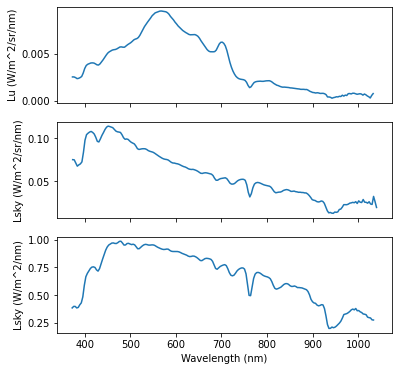

In [13]:
# let's plot data from sample no. 10

Lu_10 = log_221_long.loc['10', 'Lu'][' Spec['].values
Lu_wavelengths = spect_wavelengths['Lu'].values
Lsky_10 = log_221_long.loc['10', 'Lsky'][' Spec['].values
Lsky_wavelengths = spect_wavelengths['Lsky'].values
Ed_10 = log_221_long.loc['10', 'Ed'][' Spec['].values
Ed_wavelengths = spect_wavelengths['Ed'].values


fig, ax = plt.subplots(3, 1, sharex=True, figsize=[6, 6])
ax[0].plot(Lu_wavelengths, 
         Lu_10,
        label='Lu')
ax[0].set_ylabel('Lu (W/m^2/sr/nm)')

ax[1].plot(Lsky_wavelengths, 
         Lsky_10, 
        label='Lsky')
ax[1].set_ylabel('Lsky (W/m^2/sr/nm)')


ax[2].plot(Ed_wavelengths, 
         Ed_10,
        label='Ed')
ax[2].set_ylabel('Lsky (W/m^2/nm)')

ax[2].set_xlabel('Wavelength (nm)')



plt.show()

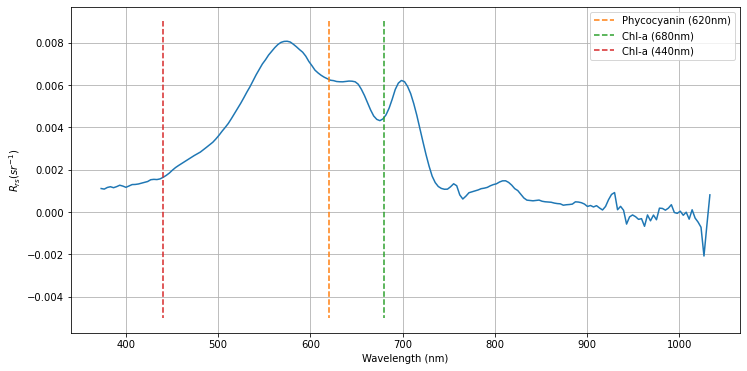

In [42]:
# very simple estimation of Rrs
# to improve this I need to get all channels on a common wavelength grid 
# and then check out some of the other DALEC recommendations

RHO = 0.028
Rrs_10 = (Lu_10 - (RHO * Lsky_10)) / Ed_10

fig, ax = plt.subplots(1, 1, figsize=[12, 6])

ax.plot(Lu_wavelengths, Rrs_10)
ax.plot([620, 620], [0.009, -0.005], '--', label='Phycocyanin (620nm)')
ax.plot([680, 680], [0.009, -0.005], '--', label='Chl-a (680nm)')
ax.plot([440, 440], [0.009, -0.005], '--', label='Chl-a (440nm)')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$R_{rs} (sr^{-1}$)')
ax.grid()


plt.legend()
plt.show()

## Functionized Code

Let's try to get some functions built which streamline the process and allow for calculation of $R_{rs}$ using a uniform grid.

In [15]:
def load_DALEC_spect_wavelengths(filepath, header=15):
    """
    Loads spectral wavelength mappings from a calibrated DALEC logfile
    """
    spect_wavelengths = pd.read_csv(filepath,
                                    header=header,
                                    nrows=200,
                                    names=['Pixel_no', 'Ed', 'Lu', 'Lsky'],
                               )
    return spect_wavelengths # these are just the mappings of wavelength to pixel number

In [26]:
def load_DALEC_log(filepath, header=216, dropNA=True, longFormat=True):
    """
    loads DALEC log file (excluding spectral wavelength mappings)
    optionally returns log file in long format
    """
    DALEC_log = pd.read_csv(filepath,
                            header=header,
                            parse_dates=True,
                            dayfirst=True,
                            infer_datetime_format=True,
                            )
    if dropNA:
        DALEC_log.dropna(inplace=True, axis=0,)
        
    if longFormat:
        # convert to long format
        # need to test that these variable names always load in this way (leading space on Spec etc.)
        DALEC_log = pd.wide_to_long(DALEC_log, [' Spec['], i=['Sample #', ' Channel'], j='spectral_ind', suffix='\d+]')
        DALEC_log.reset_index(level=2, inplace=True) # remove spectral_ind as an index
        DALEC_log['spectral_ind'] = pd.to_numeric(DALEC_log['spectral_ind'].str[:-1]) # convert spectral_ind to numeric
        DALEC_log.rename(columns={' Spec[': 'Spectral Magnitude'}, inplace=True)
        DALEC_log = DALEC_log.astype({'Spectral Magnitude': 'float64'})
        DALEC_log.sort_index(inplace=True)

    return DALEC_log

In [25]:
test_log = load_DALEC_log(file_path + file_name)
test_log

spectral_ind  Solar Azi         Lat  Roll  Saturation Flag  \
Sample #  Channel                                                               
0        Ed                  21      155.5  56.1472854   0.0                0   
         Ed                  22      155.5  56.1472854   0.0                0   
         Ed                  23      155.5  56.1472854   0.0                0   
         Ed                  24      155.5  56.1472854   0.0                0   
         Ed                  25      155.5  56.1472854   0.0                0   
...                         ...        ...         ...   ...              ...   
99       Lu                 216      156.6  56.1472816  -1.0                0   
         Lu                 217      156.6  56.1472816  -1.0                0   
         Lu                 218      156.6  56.1472816  -1.0                0   
         Lu                 219      156.6  56.1472816  -1.0                0   
         Lu                 220      156.6  56.1472816  -1.0                0   

                   Heading    Temp  Pitch      UTC Time    UTC Date  \
Sample #  Channel                                                     
0        Ed          187.8  22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8  22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8  22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8  22.125    0.0  11:01:02.645  28/04/2022   
         Ed          187.8  22.125    0.0  11:01:02.645  28/04/2022   
...                    ...     ...    ...           ...         ...   
99       Lu           83.3  22.625    0.0  11:04:10.893  28/04/2022   
         Lu           83.3  22.625    0.0  11:04:10.893  28/04/2022   
         Lu           83.3  22.625    0.0  11:04:10.893  28/04/2022   
         Lu           83.3  22.625    0.0  11:04:10.893  28/04/2022   
         Lu           83.3  22.625    0.0  11:04:10.893  28/04/2022   

                           Lon  Gearpos  Solar Elev  Relaz  GPS_Fix  \
Sample #  Channel                                                     
0        Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
         Ed        -3.92375488    179.4        45.7   32.5        A   
...                        ...      ...         ...    ...      ...   
99       Lu        -3.92361164    179.2        45.9  -73.3        A   
         Lu        -3.92361164    179.2        45.9  -73.3        A   
         Lu        -3.92361164    179.2        45.9  -73.3        A   
         Lu        -3.92361164    179.2        45.9  -73.3        A   
         Lu        -3.92361164    179.2        45.9  -73.3        A   

                   Integration Time  Voltage  Spectral Magnitude  
Sample #  Channel                                                 
0        Ed                      20     11.6            0.393371  
         Ed                      20     11.6            0.408431  
         Ed                      20     11.6            0.407562  
         Ed                      20     11.6            0.392361  
         Ed                      20     11.6            0.397835  
...                             ...      ...                 ...  
99       Lu                     137     11.5            0.000538  
         Lu                     137     11.5            0.000183  
         Lu                     137     11.5            0.000164  
         Lu                     137     11.5            0.000318  
         Lu                     137     11.5            0.000228  

[64200 rows x 18 columns]

In [38]:
from scipy import interpolate
# there are other interpolation methods too, but I think this is probably fine?

def uniform_grid_spectra(DALEC_sample, spect_wavelengths, nsteps=200, min_waveL=400, max_waveL=1000):
    """
    - takes spectrum from a single sample of a DALEC log file and converts to a uniform grid
    - grid is defined by nsteps, min_waveL and max_waveL
    """
    wavelength_grid = np.linspace(min_waveL, max_waveL, num=nsteps)
    
    y_Lu = DALEC_sample.loc['Lu']['Spectral Magnitude'].values
    x_Lu = spect_wavelengths['Lu'].values
    interp = interpolate.interp1d(x_Lu, y_Lu)
    Lu_out = interp(wavelength_grid)
    
    return Lu_out

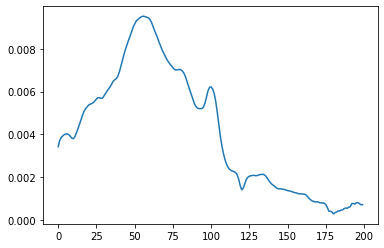

In [41]:
test_sample = test_log.loc['10', :]
Lu_test = uniform_grid_spectra(test_sample, spect_wavelengths)
plt.plot(Lu_test)

In [37]:
np.linspace(400, 1000, num=200)

array([ 400.        ,  403.01507538,  406.03015075,  409.04522613,
        412.06030151,  415.07537688,  418.09045226,  421.10552764,
        424.12060302,  427.13567839,  430.15075377,  433.16582915,
        436.18090452,  439.1959799 ,  442.21105528,  445.22613065,
        448.24120603,  451.25628141,  454.27135678,  457.28643216,
        460.30150754,  463.31658291,  466.33165829,  469.34673367,
        472.36180905,  475.37688442,  478.3919598 ,  481.40703518,
        484.42211055,  487.43718593,  490.45226131,  493.46733668,
        496.48241206,  499.49748744,  502.51256281,  505.52763819,
        508.54271357,  511.55778894,  514.57286432,  517.5879397 ,
        520.60301508,  523.61809045,  526.63316583,  529.64824121,
        532.66331658,  535.67839196,  538.69346734,  541.70854271,
        544.72361809,  547.73869347,  550.75376884,  553.76884422,
        556.7839196 ,  559.79899497,  562.81407035,  565.82914573,
        568.84422111,  571.85929648,  574.87437186,  577.88944